
At the end of the experiment:

* Understand and implement SVM algorithm to classify the given dataset
* Understand and Apply the Kernels



##Kernel

In this experiment we are using Kernels. This has been explained in detail in the **Reading material **. 


The kernel  means transforming data into another dimension that has a clear dividing margin between classes of data as shown in the below image.

![alttxt](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/kernel.png)




### Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Generating the dataset 

Considering the simple case of a classification task, in which the two classes of points are well separated.

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [ ]:
# Checking the length of X, y
X.shape , y.shape

((50, 2), (50,))

To get sense of the data, lets visualize the data

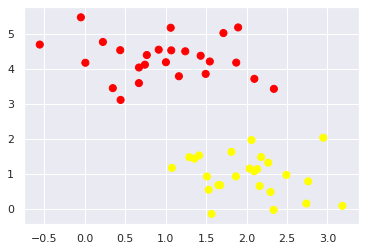

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Let us choose a new point and visualize the point.

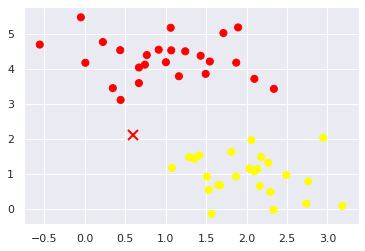

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
plt.show()

0.65
1.6
2.9


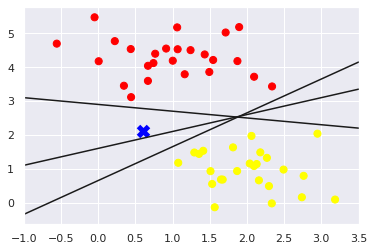

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=5, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  #print (m)
  print (b)
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

### Maximizing the Margin

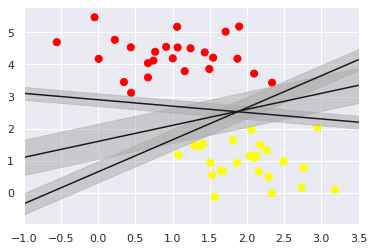

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.5)

plt.xlim(-1, 3.5);

### Trying to fit the model

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Visualizing the decision boundaries

Let us define a function to plot the decision boundaries of SVM

In [ ]:
def plot_decision_boundaries(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Let us try to call the above function by passing the trained model to observe the decision boundaries

(-0.7541740493109252, 3.3838081780236036)


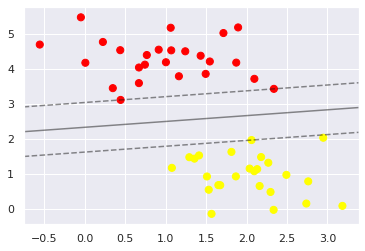

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

(-1.0, 4.0)
(-1.0, 4.0)


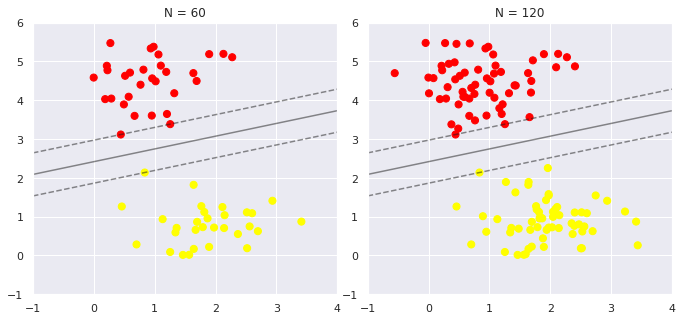

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_decision_boundaries(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Kernels

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)

To get sense of the data, let us visualize the data

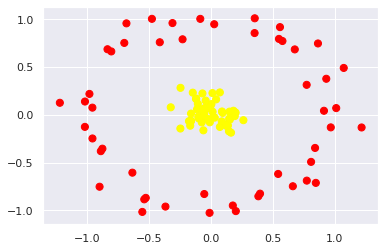

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

### Trying to fit the model using Linear Kernel

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let us visualize the decision boundaries of the data

(-1.3536462682310382, 1.3511583242497869)


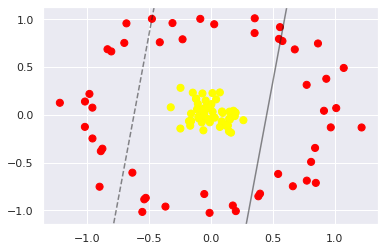

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf, plot_support=False);

### Trying to fit the model using RBF Kernel

In [ ]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(-1.3536462682310382, 1.3511583242497869)


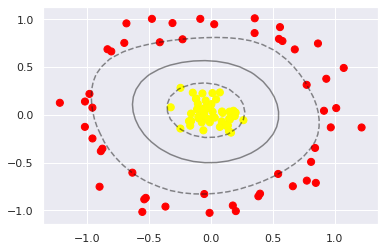

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

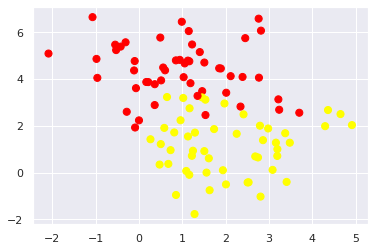

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2,
                  random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

## Tuning the SVM parameter (C)

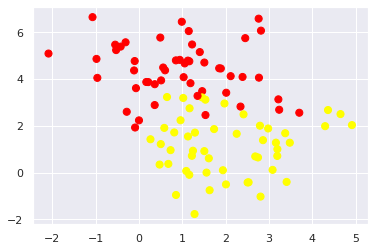

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

(-2.445423796830413, 5.273147347645621)
(-2.4454237968304127, 5.273147347645621)


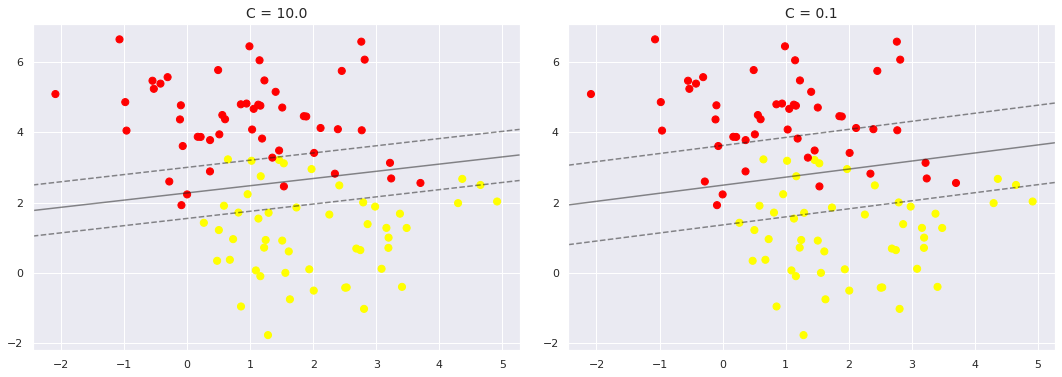

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)